# Unit 5 - Financial Planning

In [53]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [54]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [55]:
# Set current amount of crypto assets
# YOUR CODE HERE
my_btc=1.2
my_eth=5.3


In [56]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [57]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_url=btc_url+"?format=json"
response_data1=requests.get(btc_url)
response_content1=response_data1.content
data1=response_data1.json()
'''print(json.dumps(data1,indent=4))'''

# Fetch current ETH price
# YOUR CODE HERE!
eth_url=eth_url+"?format=json"
response_data2=requests.get(eth_url)
response_content2=response_data2.content
data2=response_data2.json()
''''print(json.dumps(data2,indent=4))'''
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value=data1['data']['1']['quotes']['USD']['price']*my_btc
my_eth_value=data2['data']['1027']['quotes']['USD']['price']*my_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")



The current value of your 1.2 BTC is $48301.20
The current value of your 5.3 ETH is $13537.79


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [58]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [59]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
api_key=os.getenv("ALPACA_API_KEY")
api_secret_key=os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca=tradeapi.REST(api_key,api_secret_key,api_version='v2')

In [60]:
# Format current date as ISO format
# YOUR CODE HERE!
start=pd.Timestamp('2020-05-01',tz='America/New_york').isoformat()
end=pd.Timestamp('2021-05-01',tz='America/New_york').isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_current=alpaca.get_barset(tickers,timeframe,start=start,end=end,limit=1000).df

# Preview DataFrame
# YOUR CODE HERE!
df_current

AGG                                         \
                             open      high       low    close    volume   
2020-05-01 00:00:00-04:00  116.97  117.0998  116.6775  116.900  11778582   
2020-05-04 00:00:00-04:00  116.89  117.0900  116.8700  116.975   6950122   
2020-05-05 00:00:00-04:00  116.96  116.9700  116.8100  116.880   7315932   
2020-05-06 00:00:00-04:00  116.44  116.7100  116.3000  116.450   9313368   
2020-05-07 00:00:00-04:00  116.61  116.7600  116.4200  116.730   7338194   
...                           ...       ...       ...      ...       ...   
2021-04-26 00:00:00-04:00  114.74  114.8015  114.6500  114.650   2867784   
2021-04-27 00:00:00-04:00  115.13  115.1300  114.3700  114.370   3421667   
2021-04-28 00:00:00-04:00  114.45  114.4685  114.2000  114.440   6185936   
2021-04-29 00:00:00-04:00  114.14  114.3700  114.0900  114.370   5796983   
2021-04-30 00:00:00-04:00  114.41  114.5150  114.3300  114.500   5160765   

                              SPY                                         
                             open      high       low   close     volume  
2020-05-01 00:00:00-04:00  285.31  290.6572  281.5200  282.73  222309009  
2020-05-04 00:00:00-04:00  280.74  283.9000  279.1300  283.66  140118601  
2020-05-05 00:00:00-04:00  286.64  289.2500  283.7134  286.22  144288798  
2020-05-06 00:00:00-04:00  288.04  288.4600  283.8700  284.29  130709942  
2020-05-07 00:00:00-04:00  287.75  289.7800  287.1300  287.70  137510572  
...                           ...       ...       ...     ...        ...  
2021-04-26 00:00:00-04:00  417.44  418.2200  416.8111  417.64   44689009  
2021-04-27 00:00:00-04:00  417.91  418.1400  416.3000  417.48   45962264  
2021-04-28 00:00:00-04:00  417.81  419.0100  416.9000  417.35   45533863  
2021-04-29 00:00:00-04:00  420.33  420.7200  416.4400  419.98   70595229  
2021-04-30 00:00:00-04:00  417.63  418.5400  416.3400  417.30   73129109  

[252 rows x 10 columns]

In [61]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price=float(df_current['AGG'].loc['2021-04-30','close'])
spy_close_price=float(df_current['SPY'].loc['2021-04-30','close'])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.5
Current SPY closing price: $417.3


In [62]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value=agg_close_price*my_agg
my_agg_value=spy_close_price*my_spy
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22900.00
The current value of your 200 AGG shares is $20865.00


### Savings Health Analysis

In [63]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income=12000
# Consolidate financial assets data
# YOUR CODE HERE!
crypto= my_btc_value + my_eth_value
shares= my_spy_value + my_agg_value
df_savings=pd.DataFrame()
# Create savings DataFrame
# YOUR CODE HERE!
df_savings['amount']=[crypto,shares]
df_savings.index=['crypto','shares']

# Display savings DataFrame
display(df_savings)

,amount
crypto,61838.99
shares,43765.00


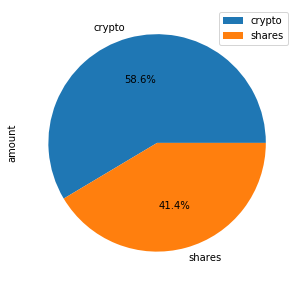

In [64]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y='amount',figsize=(10,5),autopct='%1.1f%%')


In [65]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
total_savings=df_savings['amount'].sum()
# Calculate total amount of savings
# YOUR CODE HERE!
if emergency_fund<total_savings:
    print(f"Congratulations! You have enough money in the fund.")
elif emergency_fund==total_savings:
    print(f"Congratulations! You have reached your financial goal.")
elif emergency_fund>total_savings:
    print(f"You are {emergency_fund-total_savings} away from your financial goal.")
# Validate saving health
# YOUR CODE HERE!

Congratulations! You have enough money in the fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [66]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date1 = pd.Timestamp('2016-06-11', tz='America/New_York').isoformat()
end_date1 = pd.Timestamp('2019-06-11', tz='America/New_York').isoformat()
df1=alpaca.get_barset(tickers,timeframe,start=start_date1,end=end_date1,limit=1000).df
start_date2 = pd.Timestamp('2019-06-12', tz='America/New_York').isoformat()
end_date2 = pd.Timestamp('2021-06-11', tz='America/New_York').isoformat()
df2=alpaca.get_barset(tickers,timeframe,start=start_date2,end=end_date2,limit=1000).df

In [67]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_stock_data=pd.concat([df1,df2],axis=0)
# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high     low    close     volume   
2016-06-13 00:00:00-04:00  111.57  111.6700  111.53  111.610  1521542.0   
2016-06-14 00:00:00-04:00  111.68  111.7300  111.55  111.555  1695590.0   
2016-06-15 00:00:00-04:00  111.67  111.9300  111.64  111.800  1556713.0   
2016-06-16 00:00:00-04:00  111.92  112.0699  111.78  111.860  2314934.0   
2016-06-17 00:00:00-04:00  111.86  111.8700  111.66  111.770  2581009.0   

                              SPY                                       
                             open    high       low   close     volume  
2016-06-13 00:00:00-04:00  209.36  210.37  208.3500  208.44   82156781  
2016-06-14 00:00:00-04:00  208.00  208.74  206.9199  208.08  102129228  
2016-06-15 00:00:00-04:00  208.54  209.36  207.5300  207.75   82945507  
2016-06-16 00:00:00-04:00  206.73  208.57  205.5900  208.42  111547742  
2016-06-17 00:00:00-04:00  207.17  207.20  205.7500  206.58   86657818

In [68]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_Thirty=MCSimulation(portfolio_data=df_stock_data,num_simulation=500,num_trading_days=252*30)

In [70]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_Thirty.portfolio_data.head()

AGG                                        \
                             open      high     low    close     volume   
2016-06-13 00:00:00-04:00  111.57  111.6700  111.53  111.610  1521542.0   
2016-06-14 00:00:00-04:00  111.68  111.7300  111.55  111.555  1695590.0   
2016-06-15 00:00:00-04:00  111.67  111.9300  111.64  111.800  1556713.0   
2016-06-16 00:00:00-04:00  111.92  112.0699  111.78  111.860  2314934.0   
2016-06-17 00:00:00-04:00  111.86  111.8700  111.66  111.770  2581009.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
2016-06-13 00:00:00-04:00          NaN  209.36  210.37  208.3500  208.44   
2016-06-14 00:00:00-04:00    -0.000493  208.00  208.74  206.9199  208.08   
2016-06-15 00:00:00-04:00     0.002196  208.54  209.36  207.5300  207.75   
2016-06-16 00:00:00-04:00     0.000537  206.73  208.57  205.5900  208.42   
2016-06-17 00:00:00-04:00    -0.000805  207.17  207.20  205.7500  206.58   

                                                   
                              volume daily_return  
2016-06-13 00:00:00-04:00   82156781          NaN  
2016-06-14 00:00:00-04:00  102129228    -0.001727  
2016-06-15 00:00:00-04:00   82945507    -0.001586  
2016-06-16 00:00:00-04:00  111547742     0.003225  
2016-06-17 00:00:00-04:00   86657818    -0.008828

In [71]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_Thirty.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999941,1.001306,0.999726,1.013780,0.999314,1.006004,0.992258,0.991148,0.991313,1.004625,...,1.001623,0.999138,1.008726,1.007365,1.001498,1.015335,0.997727,0.997465,1.010126,1.004170
2,1.001522,1.008857,1.000897,1.010087,1.008073,1.014772,0.991973,1.000798,0.996516,1.004405,...,0.999243,1.006844,1.012890,1.007166,0.998529,1.017266,0.994348,1.007666,1.010071,0.999944
3,1.003448,1.012016,0.997323,1.005596,1.012597,1.013105,0.992328,1.000635,0.991668,1.005630,...,0.994953,1.016049,1.006274,1.000382,1.004979,1.013880,0.991768,1.007305,1.001115,0.996633
4,1.001814,1.011073,0.997760,0.998439,1.024463,1.013494,0.987682,1.003085,0.995413,1.010964,...,0.986009,1.026214,1.005560,0.994248,1.004554,1.010220,0.997080,1.010913,1.011239,1.002168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.333608,9.805220,5.490159,4.425649,17.984245,8.117902,37.955567,6.344964,15.157711,6.806904,...,7.068041,11.969886,7.791928,11.903970,6.796759,5.162991,11.685505,15.097154,34.972234,11.701954
7557,7.257635,9.947315,5.532844,4.413785,18.010011,8.067982,37.800756,6.284517,15.070491,6.749838,...,7.067369,11.995261,7.834979,11.900635,6.766300,5.194714,11.560840,15.218701,35.000248,11.714099
7558,7.290224,10.044980,5.450573,4.408545,18.019736,8.083255,38.033336,6.267146,14.977081,6.770780,...,7.113128,11.998861,7.844508,11.808129,6.785917,5.208333,11.421662,15.232040,35.624521,11.761809
7559,7.269853,10.066600,5.521601,4.412456,18.033967,8.006063,37.903554,6.323804,14.808246,6.797598,...,7.112572,12.056797,7.934082,11.782270,6.787399,5.272397,11.553392,15.052886,35.481514,11.854756


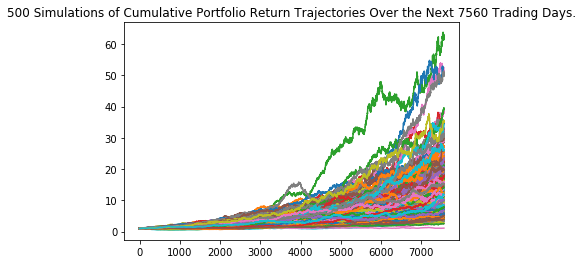

In [72]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot=MC_Thirty.plot_simulation()
line_plot

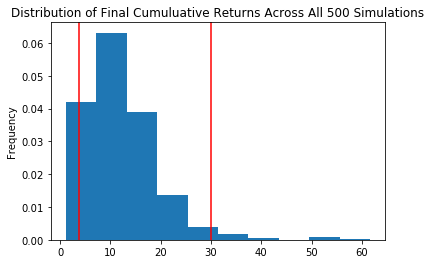

In [78]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot=MC_Thirty.plot_distribution()
dist_plot

### Retirement Analysis

In [79]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl=MC_Thirty.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean             12.407438
std               7.341853
min               1.130959
25%               7.141280
50%              10.975491
75%              15.679340
max              61.641408
95% CI Lower      3.814480
95% CI Upper     29.991277
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [84]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower=round(tbl[8]*initial_investment,2)
ci_upper=round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $76289.6 and $599825.54


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [109]:
# Set initial investment
initial_investment1 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower=round(tbl[8]*initial_investment1,2)
ci_upper=round(tbl[9]*initial_investment1,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment1} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $114434.4 and $899738.31


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [88]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five=MCSimulation(portfolio_data=df_stock_data,weights=[0.3,0.7],num_simulation=500,num_trading_days=252*5)

In [89]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003438,1.008534,1.004391,0.991721,0.986310,0.978295,1.021739,1.006538,1.000690,0.999865,...,1.012426,0.986197,1.013328,1.003277,1.010989,0.999778,1.004028,0.995046,0.995629,1.001970
2,0.993517,1.009354,1.013777,0.995206,0.991236,0.977006,1.011356,1.004527,1.000211,0.993631,...,1.020141,0.980703,1.009402,1.001028,1.018332,1.001762,1.008009,1.010578,0.996563,1.007758
3,0.994484,1.001807,1.010252,0.999747,1.005601,0.989160,1.025398,1.000296,1.006639,0.983088,...,1.014292,0.995123,1.006724,1.009654,1.011431,1.015283,0.992411,1.004672,0.985726,1.019989
4,1.009657,0.994256,1.011961,0.998871,0.995416,0.975241,1.025778,1.006029,1.009463,0.980632,...,1.011182,0.993426,0.996784,1.011347,1.003018,1.019403,0.991100,1.007510,0.974031,1.013780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.549398,2.217601,1.773639,1.431857,1.251905,1.344044,1.962353,1.635563,1.635735,1.682721,...,1.596199,1.387467,1.276841,1.594676,1.669704,2.101776,1.192970,1.517338,1.689229,1.857254
1257,1.552045,2.207854,1.766069,1.428565,1.255260,1.340778,1.970828,1.643107,1.627406,1.683969,...,1.595835,1.385921,1.292493,1.592452,1.659844,2.097664,1.189760,1.526250,1.689918,1.862730
1258,1.549991,2.220992,1.764550,1.413762,1.265647,1.331575,1.963835,1.641985,1.622702,1.652600,...,1.611471,1.409933,1.286778,1.574836,1.675238,2.091074,1.208183,1.522823,1.692273,1.876502
1259,1.550251,2.228138,1.770203,1.426243,1.273795,1.339457,1.973793,1.650265,1.618279,1.657796,...,1.584718,1.397258,1.298008,1.546663,1.679373,2.079810,1.215560,1.524536,1.718953,1.871023


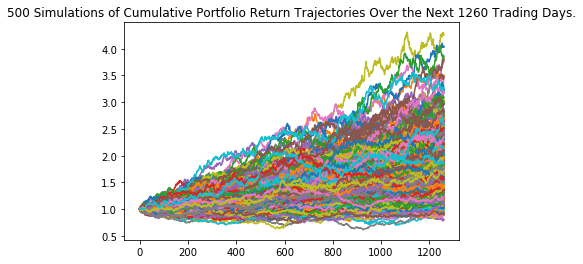

In [90]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_five.plot_simulation()

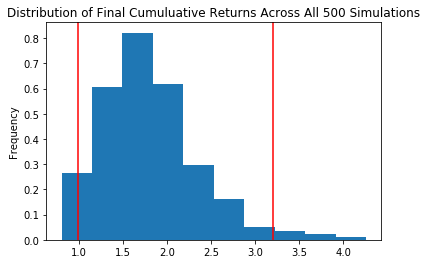

In [91]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_five.plot_distribution()

In [110]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl1=MC_five.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl1)

count           500.000000
mean              1.804197
std               0.557219
min               0.799915
25%               1.409439
50%               1.739162
75%               2.099874
max               4.255353
95% CI Lower      0.985971
95% CI Upper      3.199709
Name: 1260, dtype: float64


In [96]:
# Set initial investment
# YOUR CODE HERE!
initial_invest=75000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five=round(tbl1[8]*initial_invest,2)
ci_upper_five=round(tbl1[9]*initial_invest,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_invest} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $75000 in the portfolio over the next 5 years will end within in the range of $73947.86 and $239978.16


### Ten Years Retirement Option

In [97]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten=MCSimulation(portfolio_data=df_stock_data,weights=[0.2,0.8],num_simulation=500,num_trading_days=252*10)

In [98]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999128,0.987556,1.007415,1.012659,1.014426,1.000733,0.994491,1.014556,0.999808,0.987540,...,0.989741,0.996528,0.999874,0.991028,1.014880,1.010214,1.010393,0.995153,1.004058,0.995938
2,1.002815,0.989411,1.001445,1.010028,1.035280,1.001721,1.010568,1.015213,0.995888,0.995404,...,0.984660,0.992584,1.013637,0.986680,1.015195,1.000954,1.007037,0.978502,0.996917,0.996797
3,1.011656,1.008082,0.997801,0.995895,1.045178,1.010279,1.002522,1.015370,0.990642,0.991459,...,0.992107,0.992729,1.008747,0.984127,1.012954,0.994349,1.009177,0.988412,0.999677,0.985659
4,1.014641,1.013514,0.981071,0.993814,1.043224,1.015527,1.010031,1.026013,1.007131,0.997272,...,0.977006,0.984213,1.009384,0.982674,1.009880,0.999068,0.992159,0.999258,0.995936,0.999417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.198126,3.039588,1.094639,1.080750,2.669484,2.484329,2.285600,3.682772,3.993334,4.312113,...,2.592958,2.736530,3.845267,3.208422,2.509385,2.715220,1.778818,3.522685,3.000823,1.732070
2517,3.192265,3.024221,1.089519,1.091441,2.696095,2.492530,2.281392,3.724837,4.008180,4.291281,...,2.580526,2.745730,3.846232,3.256471,2.493046,2.679072,1.786676,3.569833,3.036178,1.718753
2518,3.181192,3.046557,1.084093,1.090210,2.672916,2.536636,2.310961,3.738446,3.912424,4.293682,...,2.552927,2.746203,3.830038,3.237126,2.474311,2.649202,1.788420,3.587285,3.079966,1.716624
2519,3.197632,3.005697,1.097374,1.076234,2.680299,2.540476,2.293708,3.788535,3.932501,4.393187,...,2.544980,2.773391,3.794328,3.153877,2.522329,2.643752,1.794929,3.577046,3.098895,1.704923


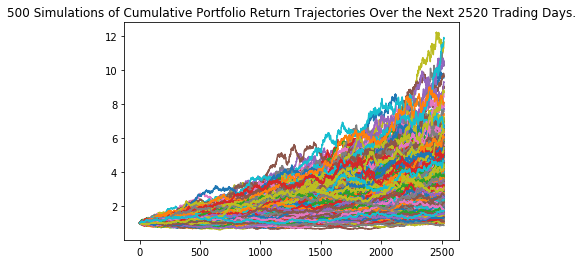

In [99]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_ten.plot_simulation()

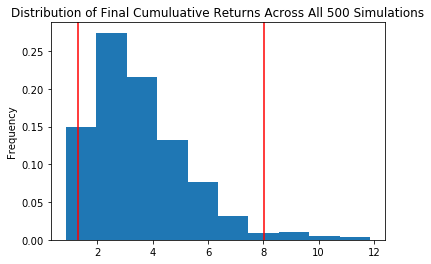

In [100]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_ten.plot_distribution()

In [102]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl2=MC_ten.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl2)

count           500.000000
mean              3.551441
std               1.762789
min               0.857828
25%               2.319054
50%               3.184096
75%               4.422968
max              11.860651
95% CI Lower      1.281190
95% CI Upper      8.010138
Name: 2520, dtype: float64


In [111]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_ten=75000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten=round(tbl2[8]*initial_investment_ten,2)
ci_upper_ten=round(tbl2[9]*initial_investment_ten,2)
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $75000 in the portfolio over the next 10 years will end within in the range of $96089.27 and $600760.36
